# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import os

# Import data

In [2]:
#change working directory
os.chdir('C:\\Users\\bittu.p\\Desktop\\practice\\Gold Loan Prediction')

In [3]:
#import dataset
df = pd.read_excel('Gold Loan.xlsx')

In [4]:
#rows and columns
df.shape

(2290, 6)

# Convert datatype of date column

In [5]:
#information of dataset (null values and datatype)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
#convert datatype of Date Column
df[['Date']] = df[['Date']].apply(pd.to_datetime)

In [7]:
#datatype of dataset after converting
df.dtypes

Date       datetime64[ns]
SPX               float64
GLD               float64
USO               float64
SLV               float64
EUR/USD           float64
dtype: object

In [8]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-02-01,1447.160034,84.860001,78.470001,15.180,1.471692
1,2008-03-01,1447.160034,85.570000,78.370003,15.285,1.474491
2,2008-04-01,1411.630005,85.129997,77.309998,15.167,1.475492
3,2008-07-01,1416.180054,84.769997,75.500000,15.053,1.468299
4,2008-08-01,1390.189941,86.779999,76.059998,15.590,1.557099


# Check null values

In [9]:
#no null values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

# Stats of dataset 

In [10]:
#simple statistics of dataset
df.describe()    

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Data visualization

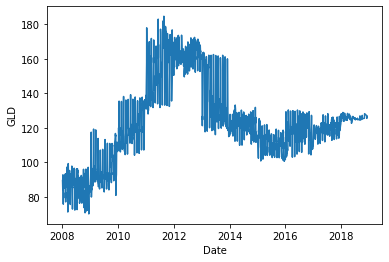

In [11]:
#line plot date vs gold price
sns.lineplot(x='Date' , y='GLD' , data = df )
plt.show()

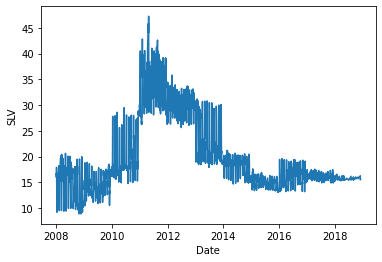

In [12]:
#line plot date vs silver price
sns.lineplot(x='Date' , y='SLV' , data = df )
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

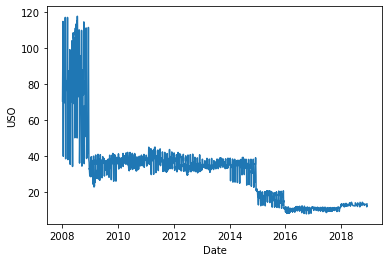

In [13]:
#line plot date vs oil price
sns.lineplot(x='Date' , y='USO' , data = df )
plt.show

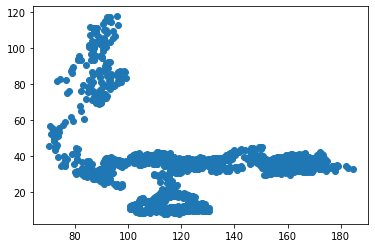

In [14]:
#scatterplot of gold price vs USD 
plt.scatter(x='GLD' , y='USO' , data = df )
plt.show()

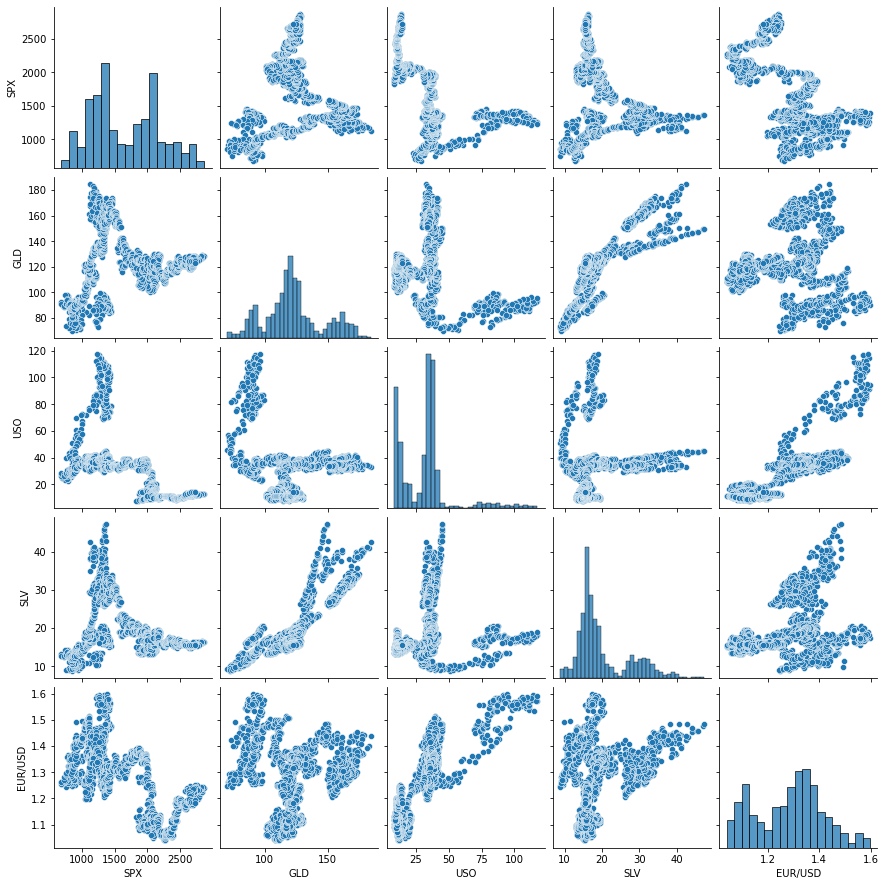

In [15]:
#pairplot of dataset
sns.pairplot(df.iloc[ :,1:6])
plt.show()

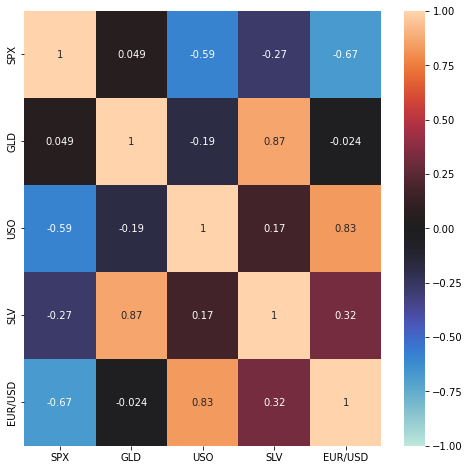

In [16]:
#correlation of dataset with heatmap diagram
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(),vmin=-1,vmax=1,center=0,annot=True)
plt.show()

C:\Users\bittu.p\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


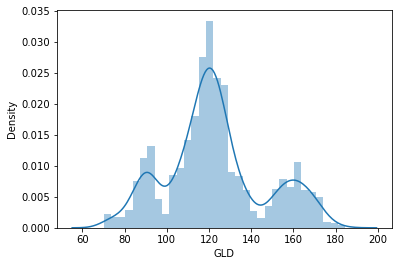

In [17]:
#distribution curve of Gold price
sns.distplot(df['GLD'])
plt.show()

In [18]:
#transpose data and make columns = Date, cols, vals 
dfm = df.melt('Date', var_name='cols', value_name='vals')

In [19]:
#transformed dataset
dfm.head()

,Date,cols,vals
0,2008-02-01,SPX,1447.160034
1,2008-03-01,SPX,1447.160034
2,2008-04-01,SPX,1411.630005
3,2008-07-01,SPX,1416.180054
4,2008-08-01,SPX,1390.189941


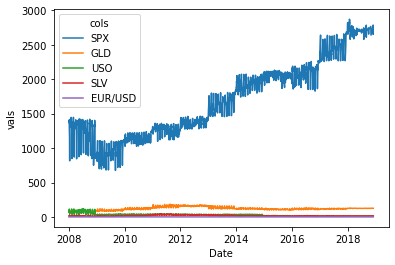

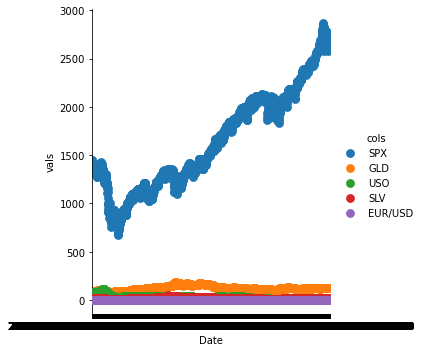

In [20]:
#lineplot of dfm dataset with all legends
sns.lineplot(x="Date", y="vals", hue='cols', data=dfm)
plt.show()
sns.catplot(x="Date", y="vals", hue='cols', data=dfm, kind='point')
plt.show()

# Make dependent and independent variable 

In [21]:
# dependent variable = y , independent variable = x
X = df.drop(["Date", "GLD"],axis=1)
Y = df["GLD"]

In [22]:
#first 5 rows of independent variable
X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [23]:
#first 5 rows of dependent variable
Y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

# Split training and testing dataset and fit

In [24]:
#make training and testing dataset and fit the model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train, Y_train)

RandomForestRegressor()

# Check accuracy

In [25]:
#check accuracy with score
regressor.score(X_test, Y_test)

0.985287891856469

In [26]:
#check accuracy with r scored method
test_data_prediction = regressor.predict(X_test)
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error :", error_score)

R squared error : 0.985287891856469


# Prediction

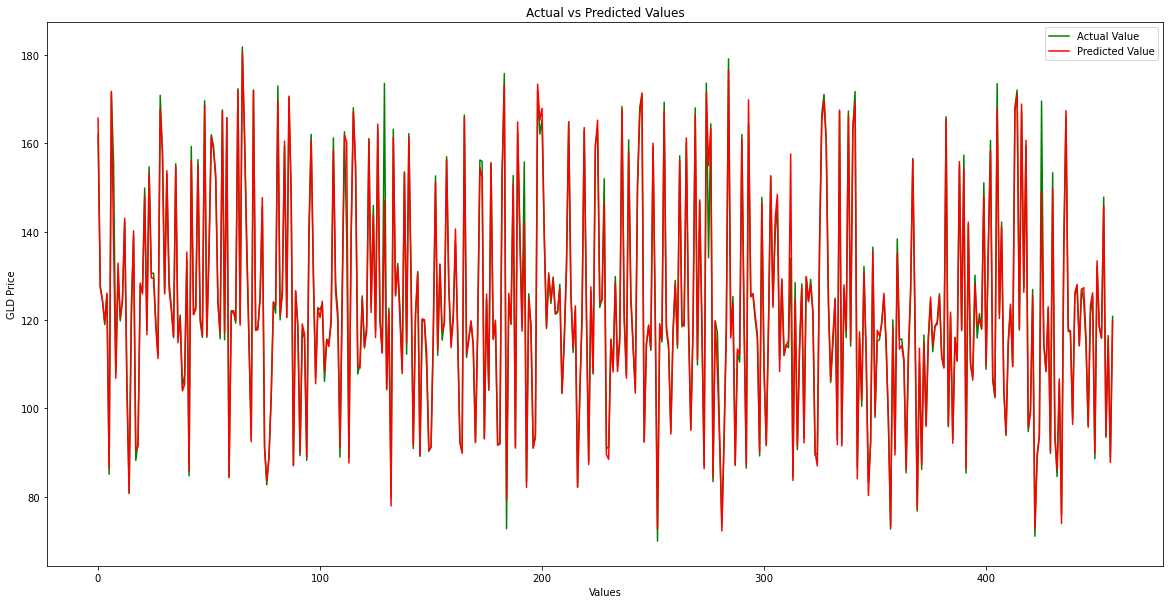

In [27]:
#prediction graph of y test dataset with prediction
y_test = Y_test.tolist()
plt.figure(figsize=(20,10))
plt.plot(y_test, color='green', label='Actual Value')
plt.plot(test_data_prediction, color='red', label='Predicted Value')
plt.title('Actual vs Predicted Values')
plt.xlabel('Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [28]:
#prediction with sample dataset
sample_prediction = np.array([1440.160034,78.370003,15.285,1.474491])
pred = sample_prediction.reshape(1,-1)
regressor.predict(pred)

C:\Users\bittu.p\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([85.43999995])